In [1]:
import sys
import logging
sys.path.append('..')
logging.getLogger().setLevel(logging.INFO)

from aural_travels.data import fma

## 1 Load Data

In [2]:
# Adjust this to your local copy of the FMA dataset.
# Should contain `fma_dataset` and `fma_metadata` directories.
DATA_DIR = '/home/leo/data/fma'

genres = fma.load_genres(DATA_DIR)
tracks = fma.load_tracks(DATA_DIR)

## 2 Genres

In [3]:
# All genres
genres

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
...,...,...,...,...
1032,60,102,Turkish,2
1060,30,46,Tango,2
1156,26,130,Fado,2


In [4]:
# Top-level genres
genres[genres.parent == 0]

,#tracks,parent,title,top_level
genre_id,,,,
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
8,868,0,Old-Time / Historic,8
9,1987,0,Country,9
10,13845,0,Pop,10
12,32923,0,Rock,12
13,730,0,Easy Listening,13


## 3 Tracks

In [5]:
# The track metadata contains four sets of columns:
# track, album, artist, and set.
tracks.columns.values

array([('album', 'comments'), ('album', 'date_created'),
       ('album', 'date_released'), ('album', 'engineer'),
       ('album', 'favorites'), ('album', 'id'), ('album', 'information'),
       ('album', 'listens'), ('album', 'producer'), ('album', 'tags'),
       ('album', 'title'), ('album', 'tracks'), ('album', 'type'),
       ('artist', 'active_year_begin'), ('artist', 'active_year_end'),
       ('artist', 'associated_labels'), ('artist', 'bio'),
       ('artist', 'comments'), ('artist', 'date_created'),
       ('artist', 'favorites'), ('artist', 'id'), ('artist', 'latitude'),
       ('artist', 'location'), ('artist', 'longitude'),
       ('artist', 'members'), ('artist', 'name'),
       ('artist', 'related_projects'), ('artist', 'tags'),
       ('artist', 'website'), ('artist', 'wikipedia_page'),
       ('set', 'split'), ('set', 'subset'), ('track', 'bit_rate'),
       ('track', 'comments'), ('track', 'composer'),
       ('track', 'date_created'), ('track', 'date_recorded'),
   

In [6]:
tracks['album'].sample(3)

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
1237,1,2008-11-26 02:42:26,2009-01-14,NaN,1,326,"<p>This first ""high fidelity"" mudboy recording...",7559,NaN,[],This Is Folk Music,13,Album
115399,3,2015-01-26 13:04:57,NaT,NaN,8,17509,"<p class=""p1"" style=""margin: 0px; padding: 8px...",325595,NaN,"[interiors c1964, existential, hardcore-punk, ...",microSong Entries,389,Album
32319,0,2010-07-04 14:09:15,NaT,NaN,1,6741,NaN,16981,NaN,[],Although through my bewildered way,17,Album


In [7]:
tracks['album', 'id'].nunique()

14854

## 4 Genre Distributions

The following code relies in the album-level metadata, which we have generated as described in the top-level README.

In [8]:
albums = fma.load_albums(DATA_DIR)

### Track-Level Genre Distribution

<AxesSubplot:>

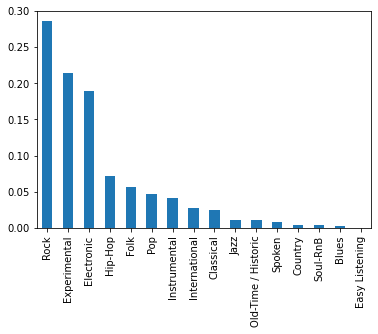

In [9]:
# Medium subset
tracks_pred = tracks[~tracks['track', 'genre_top'].isnull()]
tracks_pred[tracks_pred['set', 'subset'] <= 'medium']
tracks_pred['track', 'genre_top'].value_counts(normalize=True).plot(kind='bar')

### Album-Level Genre Distribution

<AxesSubplot:>

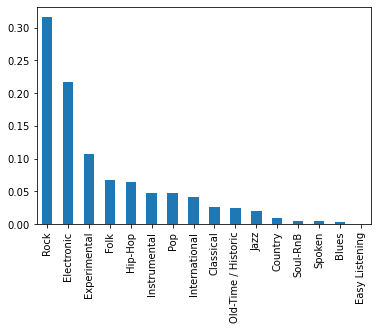

In [10]:
# Medium subset
albums_pred = albums[~albums['genre_top'].isnull()]
albums_pred = albums_pred[albums_pred['subset'] <= 'medium']
albums_pred['genre_top'].value_counts(normalize=True).plot(kind='bar')

### Data for Predicting Genre from Cover

<AxesSubplot:>

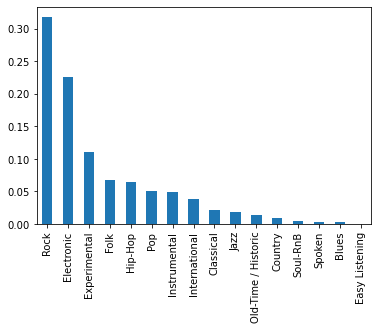

In [11]:
albums_pred = albums[~albums['genre_top'].isnull() & (albums['has_cover'] == True)]
albums_pred = albums_pred[albums_pred['subset'] <= 'medium']
albums_pred['genre_top'].value_counts(normalize=True).plot(kind='bar')

In [12]:
data = fma.GenrePredictionDataset(DATA_DIR, subset='medium', split='training')

INFO:root:Loaded album data from data_dir=`/home/leo/data/fma
INFO:root:Found 3300 albums (having cover and genre_top) in split=training, subset=medium
INFO:root:Genre distribution: Rock                   0.316970
Electronic             0.216364
Experimental           0.107879
Folk                   0.069091
Hip-Hop                0.063939
Pop                    0.045152
Instrumental           0.043939
International          0.041515
Classical              0.027576
Old-Time / Historic    0.024545
Jazz                   0.020303
Country                0.009697
Spoken                 0.004545
Blues                  0.004242
Soul-RnB               0.003939
Easy Listening         0.000303
Name: genre_top, dtype: float64


In [13]:
data = fma.GenrePredictionDataset(DATA_DIR, subset='medium', split='test')

INFO:root:Loaded album data from data_dir=`/home/leo/data/fma
INFO:root:Found 429 albums (having cover and genre_top) in split=test, subset=medium
INFO:root:Genre distribution: Rock                   0.310023
Electronic             0.198135
Experimental           0.104895
Instrumental           0.090909
Hip-Hop                0.065268
Folk                   0.051282
Pop                    0.051282
International          0.032634
Old-Time / Historic    0.025641
Jazz                   0.020979
Classical              0.018648
Soul-RnB               0.013986
Country                0.009324
Blues                  0.002331
Easy Listening         0.002331
Spoken                 0.002331
Name: genre_top, dtype: float64


In [14]:
data = fma.GenrePredictionDataset(DATA_DIR, subset='medium', split='validation')

INFO:root:Loaded album data from data_dir=`/home/leo/data/fma
INFO:root:Found 406 albums (having cover and genre_top) in split=validation, subset=medium
INFO:root:Genre distribution: Rock                   0.315271
Electronic             0.233990
Experimental           0.105911
Folk                   0.068966
Hip-Hop                0.066502
Pop                    0.059113
International          0.041872
Instrumental           0.032020
Classical              0.019704
Old-Time / Historic    0.019704
Jazz                   0.017241
Soul-RnB               0.007389
Country                0.004926
Blues                  0.002463
Easy Listening         0.002463
Spoken                 0.002463
Name: genre_top, dtype: float64


In [16]:
albums[~albums['has_cover'].isnull()].count()

title        14395
genre_top     7149
track_ids    14395
subset       14395
split        14395
has_cover    14395
dtype: int64